## Importing Libraries

In [218]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading Datasets

In [185]:
customer=pd.read_csv(r"customer_dim.csv",encoding="ISO-8859-1")
item=pd.read_csv(r"item_dim.csv",encoding="ISO-8859-1")
store=pd.read_csv(r"store_dim.csv",encoding="ISO-8859-1")
time=pd.read_csv(r"time_dim.csv",encoding="ISO-8859-1")
trans=pd.read_csv(r"trans_dim.csv",encoding="ISO-8859-1")
fact=pd.read_csv(r"fact_table.csv",encoding="ISO-8859-1")

In [187]:
data_frames={
    "customer": customer,
    "item":item,
    "store": store,
    "time": time,
    "trans": trans,
    "fact": fact
}

## Analyzing the Data

### 1. Shapes

In [140]:
for name,df in data_frames.items():
    print(name)
    print(df.shape)
    print("-"*50)

customer
(9191, 4)
--------------------------------------------------
item
(264, 7)
--------------------------------------------------
store
(726, 4)
--------------------------------------------------
time
(99999, 8)
--------------------------------------------------
trans
(39, 3)
--------------------------------------------------
fact
(1000000, 9)
--------------------------------------------------


### 2. Info

In [142]:
for name,df in data_frames.items():
    print(name)
    print(df.info())
    print("-" * 50)

customer
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9191 entries, 0 to 9190
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   coustomer_key  9191 non-null   object
 1   name           9164 non-null   object
 2   contact_no     9191 non-null   int64 
 3   nid            9191 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 287.3+ KB
None
--------------------------------------------------
item
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   item_key     264 non-null    object 
 1   item_name    264 non-null    object 
 2   desc         264 non-null    object 
 3   unit_price   264 non-null    float64
 4   man_country  264 non-null    object 
 5   supplier     264 non-null    object 
 6   unit         263 non-null    object 
dtypes: float64(1), object(6)
me

### 3. Describe

In [87]:
for name,df in data_frames.items():
    print(name)
    print(df.describe())
    print("-"*50)

customer
         contact_no           nid
count  9.191000e+03  9.191000e+03
mean   8.801753e+12  5.481175e+12
std    1.439458e+08  2.623457e+12
min    8.801510e+12  1.000824e+12
25%    8.801631e+12  3.170207e+12
50%    8.801753e+12  5.467466e+12
75%    8.801877e+12  7.776580e+12
max    8.802000e+12  9.998930e+12
--------------------------------------------------
item
       unit_price
count  264.000000
mean    17.554924
std      8.635017
min      6.000000
25%     13.000000
50%     16.000000
75%     20.000000
max     55.000000
--------------------------------------------------
store
       store_key division district  upazila
count        726      726      726      726
unique       726        7       64      540
top        S0001    DHAKA    DHAKA  KOTWALI
freq           1      280      162        5
--------------------------------------------------
time
               hour           day         month          year
count  99999.000000  99999.000000  99999.000000  99999.000000
mean      

### 4. ToList

In [95]:
for name,df in data_frames.items():
    print(name)
    print(df.columns.tolist())
    print("-"*50)

customer
['coustomer_key', 'name', 'contact_no', 'nid']
--------------------------------------------------
item
['item_key', 'item_name', 'desc', 'unit_price', 'man_country', 'supplier', 'unit']
--------------------------------------------------
store
['store_key', 'division', 'district', 'upazila']
--------------------------------------------------
time
['time_key', 'date', 'hour', 'day', 'week', 'month', 'quarter', 'year']
--------------------------------------------------
trans
['payment_key', 'trans_type', 'bank_name']
--------------------------------------------------
fact
['payment_key', 'coustomer_key', 'time_key', 'item_key', 'store_key', 'quantity', 'unit', 'unit_price', 'total_price']
--------------------------------------------------


## Checking Missing Values

In [144]:
for name,df in data_frames.items():
    print(name)
    print(df.isnull().sum())
    print("-"*50)

customer
coustomer_key     0
name             27
contact_no        0
nid               0
dtype: int64
--------------------------------------------------
item
item_key       0
item_name      0
desc           0
unit_price     0
man_country    0
supplier       0
unit           1
dtype: int64
--------------------------------------------------
store
store_key    0
division     0
district     0
upazila      0
dtype: int64
--------------------------------------------------
time
time_key    0
date        0
hour        0
day         0
week        0
month       0
quarter     0
year        0
dtype: int64
--------------------------------------------------
trans
payment_key    0
trans_type     0
bank_name      1
dtype: int64
--------------------------------------------------
fact
payment_key         0
coustomer_key       0
time_key            0
item_key            0
store_key           0
quantity            0
unit             3723
unit_price          0
total_price         0
dtype: int64
-----------

### 1. Checking rows having missing values for column "name" in customer

In [165]:
customer[customer["name"].isnull()]

,coustomer_key,name,contact_no,nid


### 2. Checking rows having missing values for column "unit" in item

In [58]:
item[item["unit"].isnull()]

,item_key,item_name,desc,unit_price,man_country,supplier,unit
157,I00158,Frito Bold Flavors Variety,Food - Chips,17.0,Lithuania,BIGSO AB,NaN


### 3. Checking rows having missing values for column "bank_name" in trans

In [60]:
trans[trans["bank_name"].isnull()]

,payment_key,trans_type,bank_name
0,P001,cash,NaN


### 4. Checking rows having missing values for column "unit" in fact

In [62]:
fact[fact["unit"].isnull()]

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price
413,P030,C001653,T053668,I00158,S00327,1,NaN,17.0,17.0
478,P013,C008861,T036513,I00158,S00280,9,NaN,17.0,153.0
1500,P007,C008864,T052262,I00158,S00308,7,NaN,17.0,119.0
2033,P037,C002870,T050819,I00158,S00506,7,NaN,17.0,119.0
2053,P020,C003666,T094595,I00158,S0077,11,NaN,17.0,187.0
...,...,...,...,...,...,...,...,...,...
998455,P016,C007003,T04678,I00158,S00522,1,NaN,17.0,17.0
998754,P039,C004215,T022792,I00158,S0092,9,NaN,17.0,153.0
998757,P027,C000309,T07076,I00158,S00550,9,NaN,17.0,153.0
999136,P033,C008559,T070336,I00158,S00553,11,NaN,17.0,187.0


## Handling Missing Values

In [181]:
customer = customer.assign(name=customer["name"].fillna("Unknown"))
customer.isnull().sum()

coustomer_key    0
name             0
contact_no       0
nid              0
dtype: int64

In [189]:
item = item.assign(unit=item["unit"].fillna("Unknown"))
item.isnull().sum()

item_key       0
item_name      0
desc           0
unit_price     0
man_country    0
supplier       0
unit           0
dtype: int64

In [191]:
trans = trans.assign(bank_name=trans["bank_name"].fillna("Unknown"))
trans.isnull().sum()

payment_key    0
trans_type     0
bank_name      0
dtype: int64

In [193]:
fact = fact.assign(unit=fact["unit"].fillna("Unknown"))
fact.isnull().sum()

payment_key      0
coustomer_key    0
time_key         0
item_key         0
store_key        0
quantity         0
unit             0
unit_price       0
total_price      0
dtype: int64

## Checking Duplicate Values

In [111]:
for name,df in data_frames.items():
    print(name)
    print(df.nunique())
    print("-"*50)

customer
coustomer_key    9191
name             4534
contact_no       9190
nid              9191
dtype: int64
--------------------------------------------------
item
item_key       264
item_name      259
desc            30
unit_price      46
man_country     10
supplier        10
unit            18
dtype: int64
--------------------------------------------------
store
store_key    726
division       7
district      64
upazila      540
dtype: int64
--------------------------------------------------
time
time_key    99999
date        98578
hour           24
day            31
week            4
month          12
quarter         4
year            8
dtype: int64
--------------------------------------------------
trans
payment_key    39
trans_type      3
bank_name      38
dtype: int64
--------------------------------------------------
fact
payment_key         39
coustomer_key     9191
time_key         99993
item_key           264
store_key          726
quantity            11
unit               

## Univariate Analysis

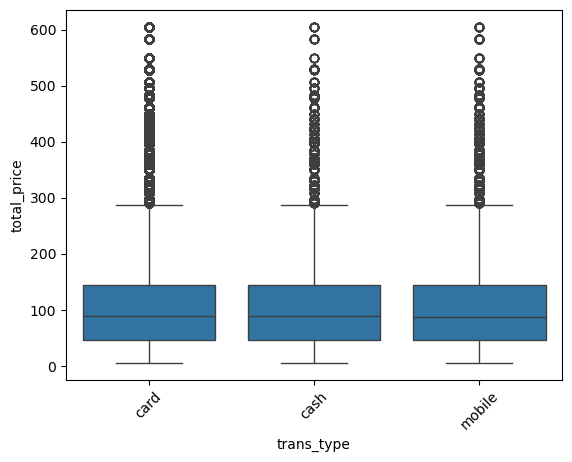

In [220]:
sns.boxplot(x="trans_type", y="total_price", data=fact.merge(trans, on="payment_key"))
plt.xticks(rotation=45)
plt.show()

In [202]:
print(fact["total_price"].describe())

count    1000000.000000
mean         105.401436
std           80.829301
min            6.000000
25%           47.250000
50%           90.000000
75%          144.000000
max          605.000000
Name: total_price, dtype: float64


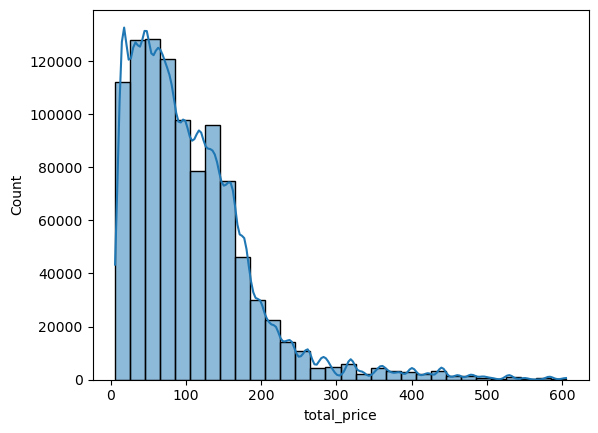

In [204]:
sns.histplot(fact["total_price"], bins=30, kde=True)
plt.show()

## Bivariate Analysis

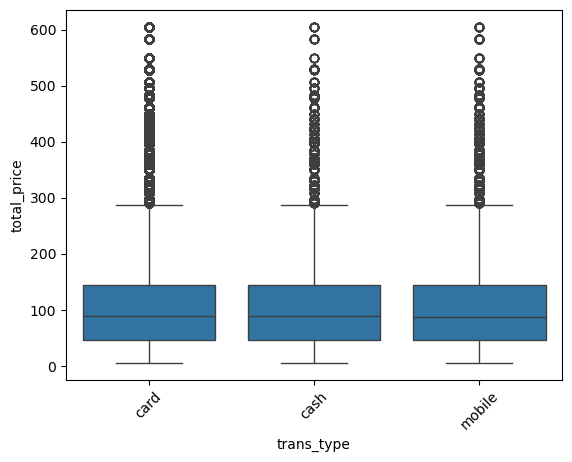

In [207]:
sns.boxplot(x="trans_type", y="total_price", data=fact.merge(trans, on="payment_key"))
plt.xticks(rotation=45)
plt.show()

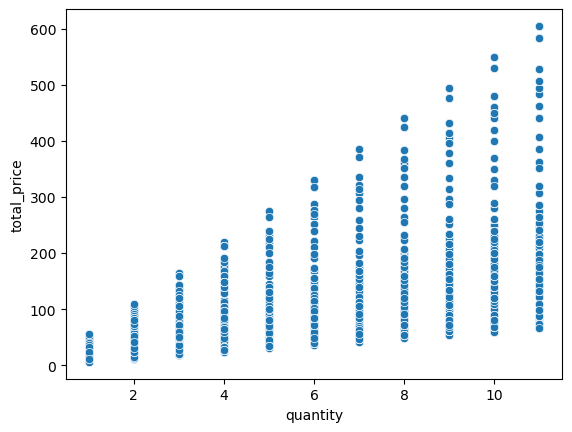

In [209]:
sns.scatterplot(x="quantity", y="total_price", data=fact)
plt.show()

In [213]:
pd.crosstab(trans["trans_type"], trans["bank_name"])

bank_name,AB Bank Limited,BRAC Bank Limited,Bangladesh Commerce Bank Limited,Bank Asia Limited,Bengal Commercial Bank Ltd,Bkash,Citizens Bank Limited,City Bank Limited,Community Bank Bangladesh Limited,Dhaka Bank Limited,...,Pubali Bank Limited,Rocket,Shimanto Bank Ltd,South Bangla Agriculture and Commerce Bank Limited,Southeast Bank Limited,Standard Bank Limited,Trust Bank Limited,United Commercial Bank Ltd,Unknown,Uttara Bank Limited
trans_type,,,,,,,,,,,,,,,,,,,,,
card,1,1,1,1,1,0,1,1,1,1,...,1,0,1,1,1,1,1,1,0,1
cash,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
mobile,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## Multivariate Analysis

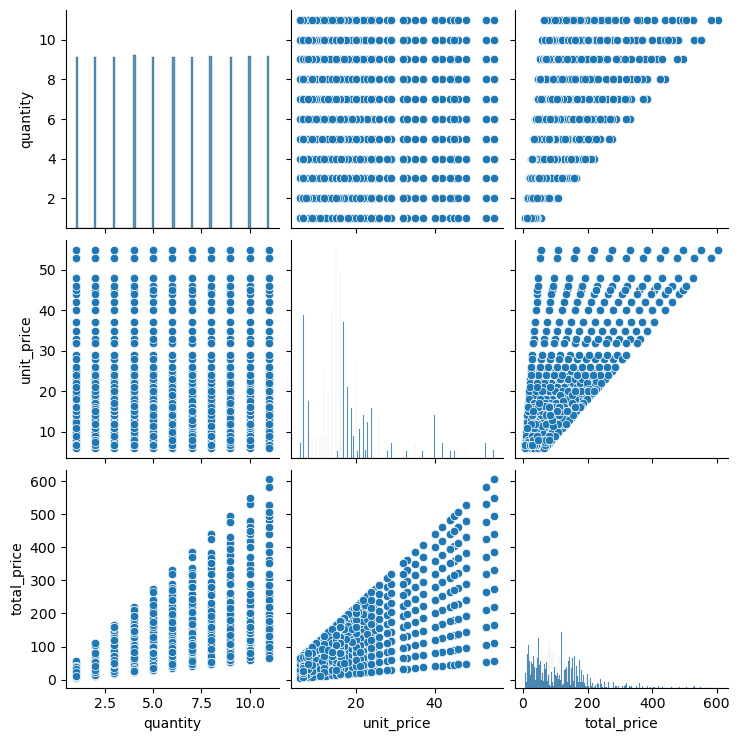

In [216]:
sns.pairplot(fact[["quantity", "unit_price", "total_price"]])
plt.show()

## Saving the cleaned dataset as a csv file

In [225]:
customer.to_csv('customer.csv', index=False)
item.to_csv('item.csv', index=False)
store.to_csv('store.csv', index=False)
time.to_csv('time.csv', index=False)
trans.to_csv('trans.csv', index=False)
fact.to_csv('fact.csv', index=False)